\begin{center}
Gabe Morris
\end{center}

In [1]:
import sympy as sp
import matplotlib.pyplot as plt
from IPython.display import display, Latex
from scipy.integrate import odeint
import numpy as np

plt.style.use('maroon.mplstyle')


def display_latex(text):
    if isinstance(text, list):
        for thing in text:
            display(Latex(f'${sp.latex(thing)}$'))
    else:
        display(Latex(f'${sp.latex(text)}$'))


t, s = sp.symbols('t s')

\pagebreak
\tableofcontents
\pagebreak

\begin{center}
\begin{tabular}{c c c}
ME 6643 & Homework 4 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 8.27
## Given
A certain system has two coupled subsystems. One subsystem is a rotational system with the equation of motion:

$50\dot{\omega}+10\omega=T(t)$

where $T(t)$ is the torque applied by an electric motor. The second subsystem is field-controlled motor. The model of the motor's field current, $i_f$ in amperes is:

$0.001\dot{i_f}+5i_f=v(t)$

where $v(t)$ is the voltage applied to the motor. The motor torque constant is $K_T=25\,N\cdot m/A$.

## Find
Obtain the damping ratio $\zeta$, time constants, and undamped natural frequency $\omega_n$ of the combined system.

## Solution
The system of differential equations can be related to each other from the following,

$T(t)=K_Ti_f$

This leaves us with a system of differential equations with only one input ($v(t)$). We need to obtain the transfer function and analyze the characteristic equation.

$\begin{cases}
50\dot{\omega}+10\omega=25i_f \\
0.001\dot{i_f}+5i_f=v(t)
\end{cases}$

In [2]:
# Define symbols and put system in s domain
I_f, W, V = sp.Function('I_f')(s), sp.Function(r'\omega')(s), sp.Function('V')(s)

eq1 = sp.Eq(50*s*W + 10*W, 25*I_f)
eq2 = sp.Eq(0.001*s*I_f + 5*I_f, V)

display_latex([eq1, eq2])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [3]:
# Solve the system
solved = sp.solve([eq1, eq2], (W, I_f), dict=True)[0]
solved_list = [sp.Eq(key, value) for key, value in solved.items()]
display_latex(solved_list)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [4]:
# Grab the characteristic polynomial
poly = 1/solved[W]*2500*V
poly

5.0*s**2 + 25001.0*s + 5000.0

The system is stable because all the signs of the equation are the same.

In [5]:
# Find the roots
roots = list(sp.roots(poly))
display_latex(roots)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

There is no imaginary part of either root indicating that the system is overdamped. This means that the damping ratio should be greater than 1.

In [6]:
# Calculating the undamped natural frequency (shaft equation)
sp.sqrt(5000/5)

31.6227766016838

In [7]:
# Calculating the damping ratio (shaft equation)
(25001/(2*sp.sqrt(5*5000))).n()

79.0601037818697

In [8]:
# The time constants are the negative of the reciprocal of the roots because the damping ratio is greater than 1
# This means that we cannot do the 1/(zeta*undamped frequency)
display_latex([-1/root for root in roots])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Answer
$\omega_n=31.6\,\frac{rad}{s}$, $\zeta=79.1$, and $\tau_1=5\,s;\;\tau_2=0.0002\,s$

## Verification
The roots of the characteristic polynomial may also be obtained by putting the system in the matrix form.

In [9]:
M = sp.Matrix([
    [50*s + 10, -25],
    [0, 0.001*s + 5]
])
M

Matrix([
[50*s + 10,         -25],
[        0, 0.001*s + 5]])

In [10]:
other_poly = sp.det(M)
other_poly

0.05*s**2 + 250.01*s + 50

In [11]:
display_latex(list(sp.roots(other_poly)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

\pagebreak

\begin{center}
\begin{tabular}{c c c}
ME 6643 & Homework 4 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 8.29
## Given
$\ddot{x}+4\dot{x}+8x=2u_s(t)$

## Find
Compute the maximum percent overshoot, the maximum overshoot, the peak time, the 100% rise time, the delay time, and the 2% settling time for the following model. The initial conditions are zero. Time is measured in seconds.

## Solution
Check to see if the solution is underdamped before proceding.

In [12]:
display_latex(list(sp.roots(t**2 + 4*t + 8)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

The system is underdamped because the roots have imaginary components.

In [13]:
# Define the equations
M_percent, M_p, t_p, t_r, t_d, t_s = sp.symbols(r'M_{\%} M_p t_p t_r t_d t_s')
zeta, phi, w_n, k = sp.symbols(r'\zeta \phi \omega_n k')

equations = [
    sp.Eq(M_percent, 100*sp.E**(-sp.pi*zeta/sp.sqrt(1 - zeta**2))),
    sp.Eq(M_p, 1/k*sp.E**(-sp.pi*zeta/sp.sqrt(1 - zeta**2))),
    sp.Eq(t_p, sp.pi/(w_n*sp.sqrt(1 - zeta**2))),
    sp.Eq(t_r, (2*sp.pi - phi)/(w_n*sp.sqrt(1 - zeta**2))),
    sp.Eq(t_d, (1 + 0.7*zeta)/w_n),
    sp.Eq(t_s, 4/(zeta*w_n)),
    sp.Eq(phi, sp.atan(sp.sqrt(1 - zeta**2)/zeta) + sp.pi)
]
display_latex(equations)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [14]:
# Write a quick algorithm for substituting in values
m, c, k_ = 1/2, 2, 4  # The formulas are based on the forced response being the unit step function alone
zeta_ = c/(2*sp.sqrt(m*k_))
w_n_ = sp.sqrt(k_/m)
phi_ = sp.atan(sp.sqrt(1 - zeta_**2)/zeta_) + sp.pi

eval_equations = []
for eq in equations:
    expr = eq.rhs
    if zeta in expr.free_symbols:
        expr = expr.subs(zeta, zeta_)

    if w_n in expr.free_symbols:
        expr = expr.subs(w_n, w_n_)

    if phi in expr.free_symbols:
        expr = expr.subs(phi, phi_)

    if k in expr.free_symbols:
        expr = expr.subs(k, k_)

    eval_equations.append(sp.Eq(eq.lhs, expr.n()))

display_latex(eval_equations)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Answer
See above cell

\pagebreak

\begin{center}
\begin{tabular}{c c c}
ME 6643 & Homework 4 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 8.35
## Given
The figure below shows the response of a system to a step input of magnitude 1000 N. The equation of motion is,

$m\ddot{x}+c\dot{x}+kx=f(t)$

\begin{center}
\includegraphics{images/img}
\end{center}

## Find
Estimate the values of $m$, $c$, and $k$.

## Solution
The following values may be obtained by looking at the figure,

$x_{ss}=0.025\,m$ \
$t_p=0.125\,s$ \
$x_{max}=0.0395\,m$

And the steady state force is,

$f_{ss}=1000\,N$

At steady state, the system is static. That means we can directly apply Hooke's Law to obtain the stiffness:

$k=\frac{f_{ss}}{x_{ss}}=40,000\,\frac{N}{m}$

The maximum percent overshoot is defined as,

$M_{\%}=\frac{x_{max}-x_{ss}}{x_{ss}}(100)=58\%$ \
$R=\ln(\frac{100}{M_{\%}})=0.545$

The damping ratio is,

$\zeta=\frac{R}{\sqrt{\pi^2+R^2}}=0.171$

The undamped natural frequency is,

$\omega_n=\frac{\pi}{t_p\sqrt{1-\zeta^2}}=25.51\,\frac{rad}{s}$

The value of m,

$m=\frac{k}{\omega_n^2}=61.48\,kg$

The value of c,

$c=2\zeta\sqrt{mk}=535.8$

## Answer
$m=61.48\,kg$, $c=535.8\,\frac{N\,s}{m}$, and $k=40,000\,\frac{N}{m}$

## Verification
Here is a quick numerical solution.

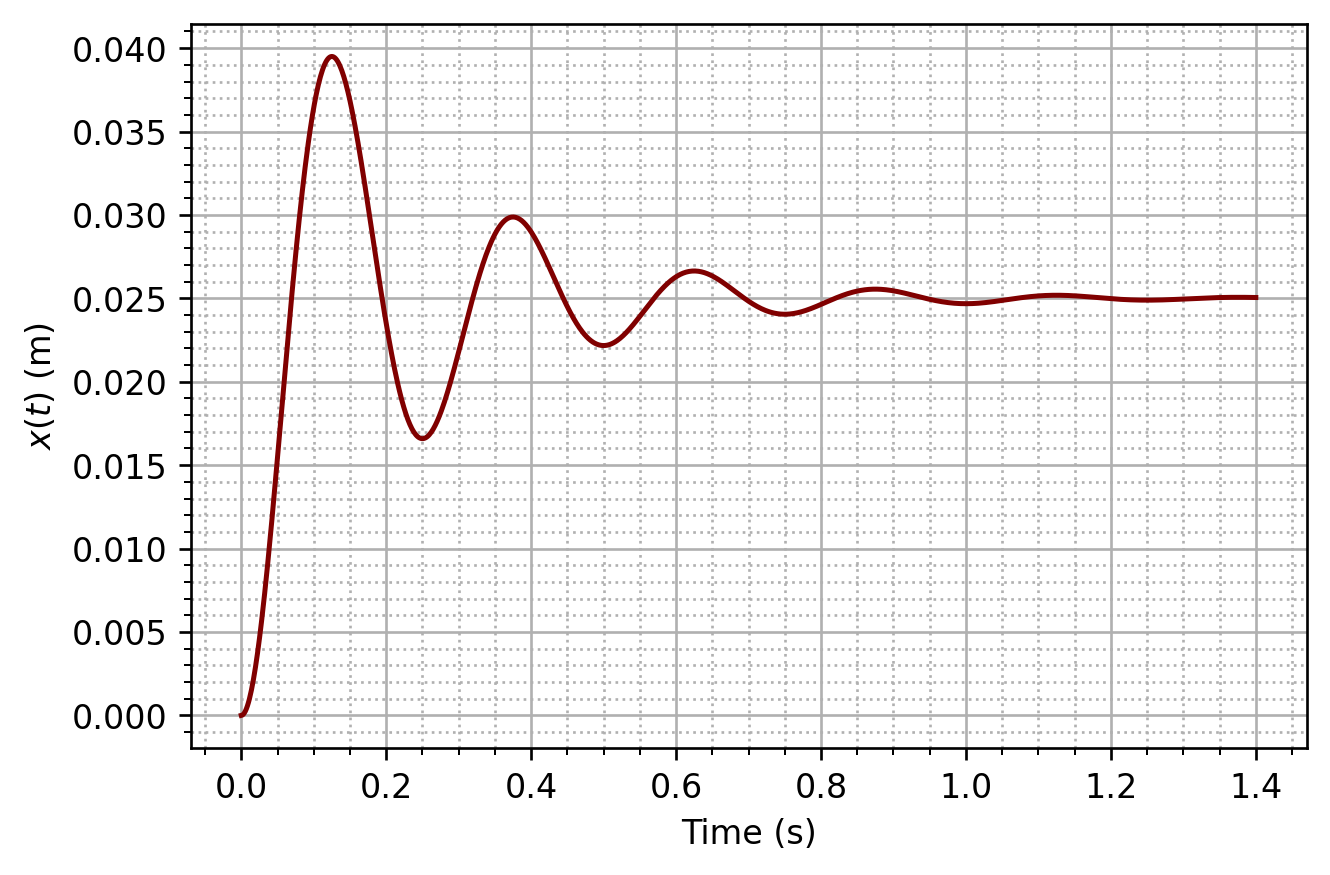

In [15]:
m, c, k = 61.48, 535.8, 40_000

def diffs(x, _):
    return [
        x[1],
        (1000 - c*x[1] - k*x[0])/m
    ]

time = np.linspace(0, 1.4, 1000)
solution = odeint(diffs, [0, 0], time)

plt.plot(time, solution[:, 0])
plt.xlabel('Time (s)')
plt.ylabel('$x(t)$ (m)')
plt.minorticks_on()
plt.grid(which='minor', ls=':')
plt.show()